# Implementation of a Neural Network called MLP (Multi-Layer Perceptron)
# Let's write a Simple Keras in Python from scratch !

A multilayer perceptron (MLP) is a class of feedforward artificial neural network (ANN). Multilayer perceptrons are sometimes colloquially referred to as "vanilla" neural networks, especially when they have a single hidden layer.

An MLP consists of at least three layers of nodes: an input layer, a hidden layer and an output layer. Except for the input nodes, each node is a neuron that uses a nonlinear activation function. MLP utilizes a supervised learning technique called backpropagation for training. Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can distinguish data that is not linearly separable. 

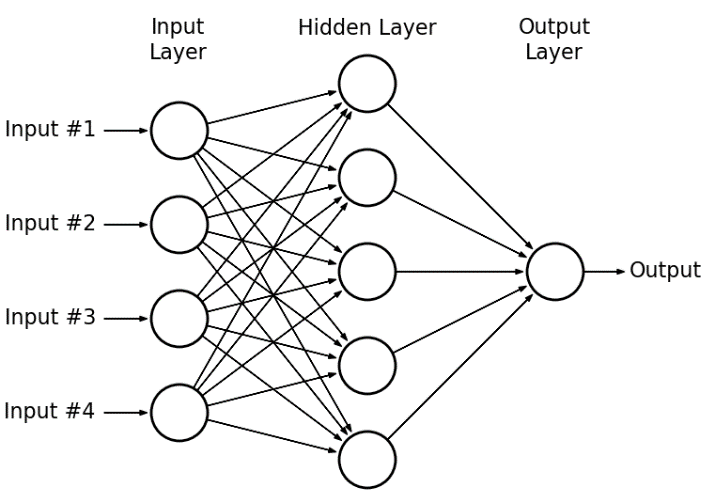

We now see how to implement a simple multilayer perceptron neural network (or simply MLP) in Python using the numerics library NumPy. This low-level implementation allows to understand the underlying mechanisms of simple neural networks. Multilayer perceptrons can process any abstract vector space representation of data, i.e., any data you can represent as an vector of numbers.

# All Imports

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical 

# Activation Functions

In the following, the activation functions’ definitions, derivatives and implementations are shown. 

The sigmoid activation function is defined by the formula:

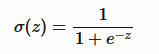

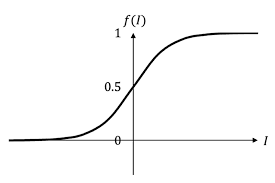

In [4]:
def sigma(x):
    return expit(x)

with its derivative:

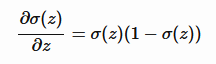

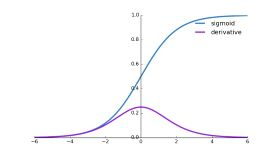

In [5]:
def sigma_prime(x):
    u = sigma(x)
    return u*(1-u)

The rectifier activation function is defined as the positive part of its argument. In scientific publications, different notations of this activation function can be found:

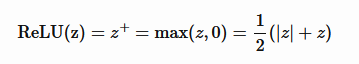

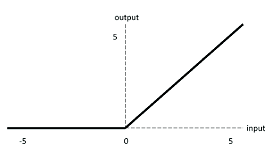

In [6]:
def relu(x):
    return x*(x>0)

with its derivative:

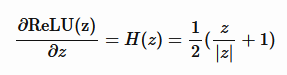

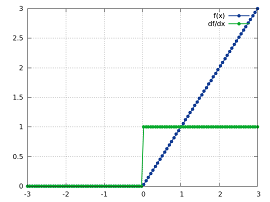

where H(z) is the Heaviside function.

In [7]:
def relu_prime(x):
    return (x>0)

Hyperbolic Tangent is a function defined everywhere with codomain between -1.0 and +1.0

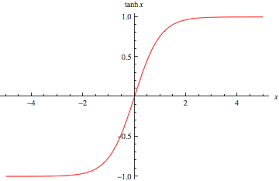

In [8]:
def tanh(x):
    return np.tanh(x);

with its derivative:

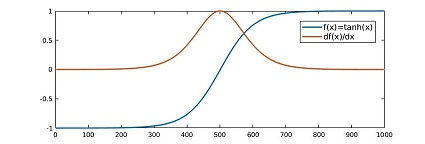

In [9]:
def tanh_prime(x):
    return 1-np.tanh(x)**2;

# Loss Functions

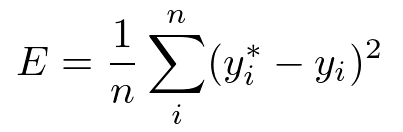

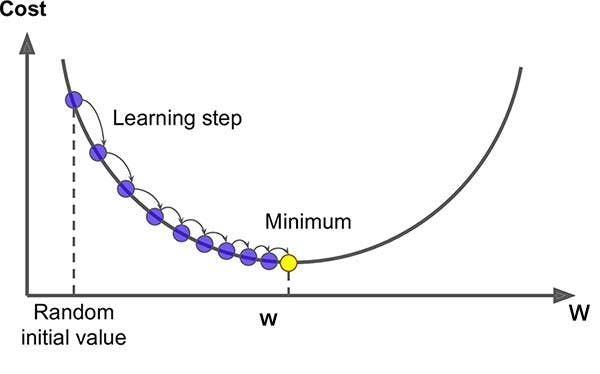

In [10]:
def mse(y_true, y_pred):
    return np.mean(np.power(y_true-y_pred, 2));

with its derivative:

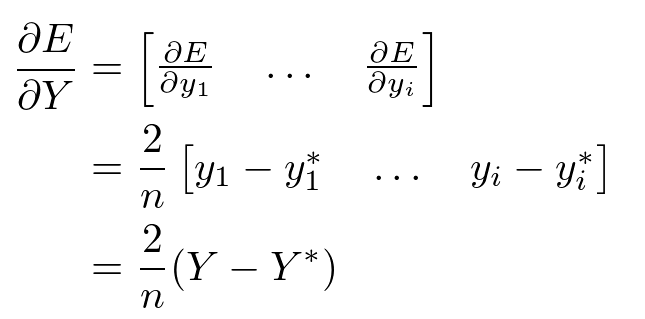

In [11]:
def mse_prime(y_true, y_pred):
    return 2*(y_pred-y_true)/y_true.size;

# Feedforward or Activation or Spread of an Artificial Neural Network

The feedforward operation or activation of a neural network is a fairly simple process that consists of successive matrix-vector multiplications. It uses the list of weights and biases from the last section to transform the network’s input data in a nonlinear fashion projecting it to the output neurons.

# Forward Stage

The forward propagatin or spread of a Neural Netwokr (in this case MLP) is the process that makes the output of one layer being the input of the next one.Initially, input data feeds the first layer, then the output of every layer gets the input of the next layer up to the end of the neural network. When we have the output of a neural network Y^, it is possible to calculate the error E with the desired output Y. This error is calculated by the loss function (or cost) and our aim is minimizing this error. The error minimization will affect the parameters (synaptic weights and biases) by getting always the best parameters and the best mapping function (or hypothesis). The backpropagation is the algorithm from Rumelhart able to update the network weights iteratively. The value of each output neuron can be calculated as the following, during the activation:

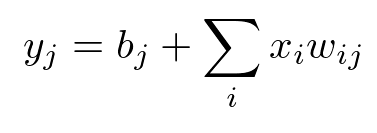

where:

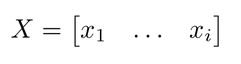

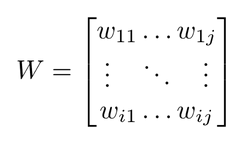

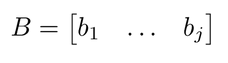

In vectorial terms we can write: 

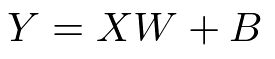

# Backward Stage

In this stage, we update neural network synaptic weights and biases in order to decrease the error E, namely the distance between Real Output (Y) and Predicted Output (Y^). The **Gradient Descent Algorithm** allows us to update these weights and biases. When we see Regression we will analyze Gradient Descent more in detail. But keep in mind: Backpropagation and Gradient Descent are not the same thing, GD is an algorithm to find the minimum of the loss, BP is an algorithm to update all the weights of a multi layer neural network. Now, our aim is to find the value of the gradient of the Error with regard to the weights for any layer of the multi layer perceptron undependently on its own topology:

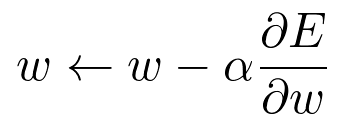

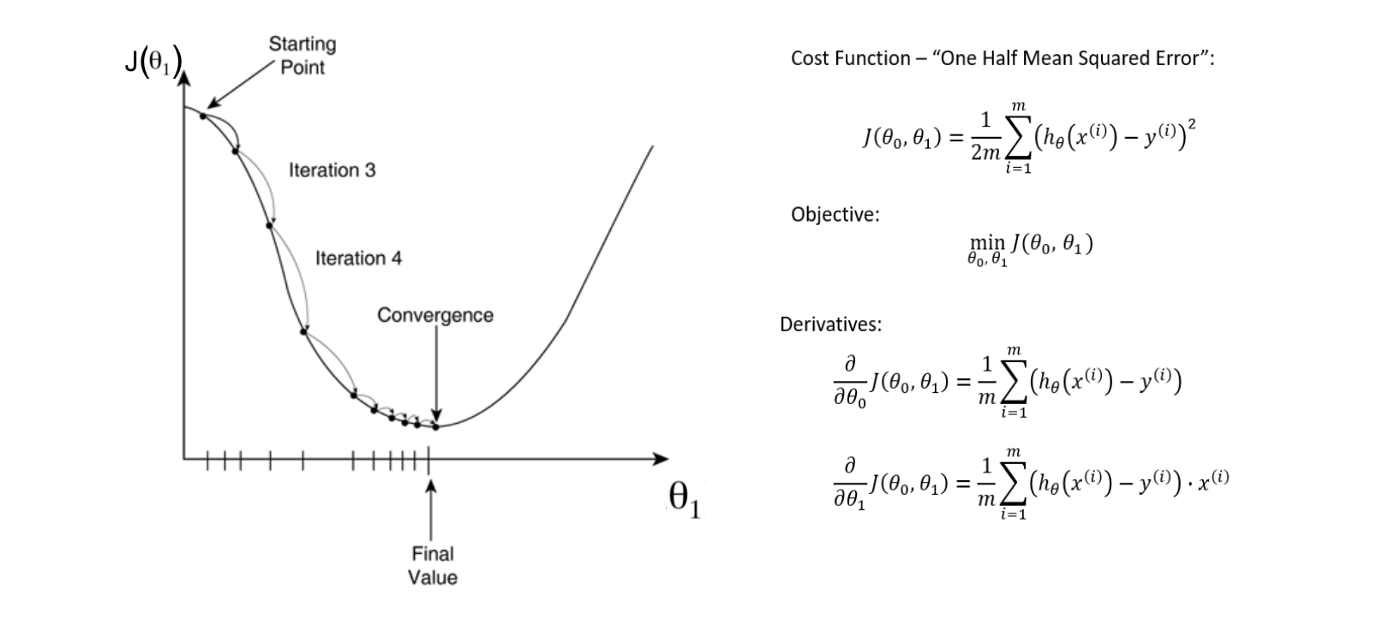

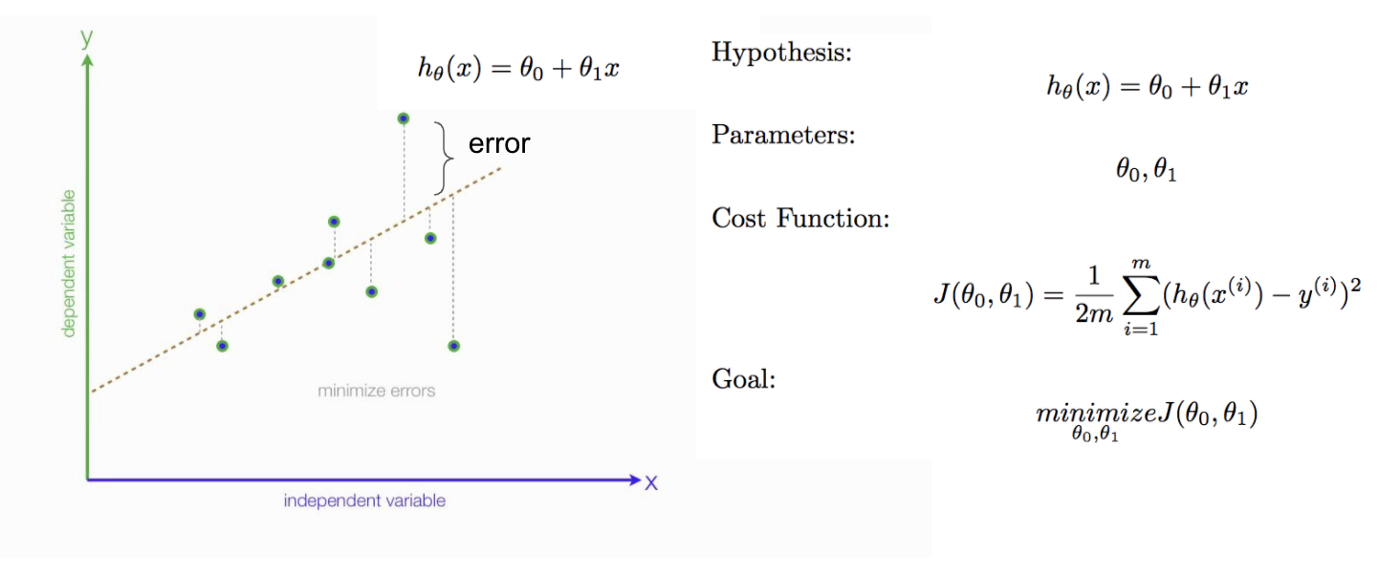

What we can do and we know, is to calculate the only error with respect to the output, which will provide the derivative of the error with regard to the input of each layer:

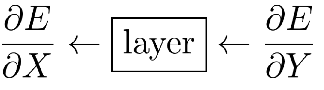

The purpose is to reach the minimum of the **Loss Function**. Choosing the gradient, Gradient Descent will find the path with maximum slope every time, actually Gradients define the direction with maximum slope where to move: 

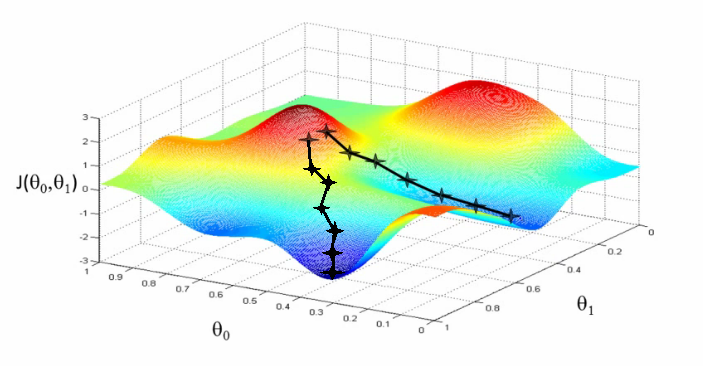

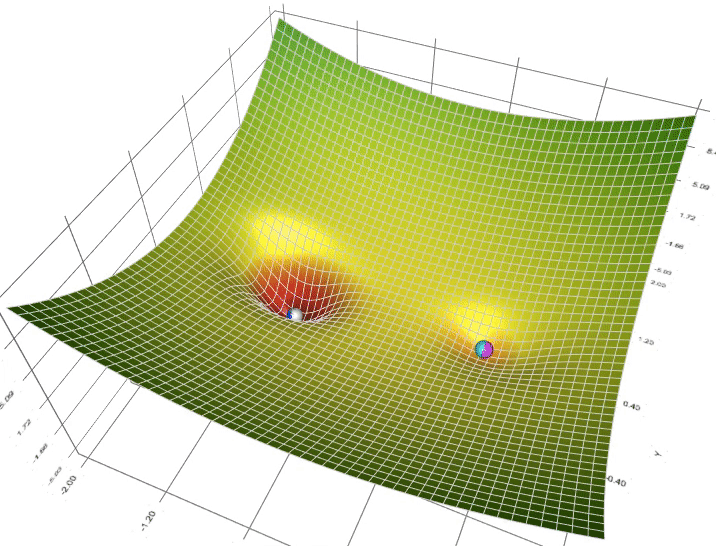

The weigths are updated with the gradients of errors (partial derivatives). Where α is the learning rate, which is an hyper-parameter ranging in the interval [0,1], and defines the speed with which the loss minimum will be achieved. ∂E/∂w represents the derivative of E with respect to w, and also this defines the step of increasing the weights. The gradient is the vector of partial derivatives: 

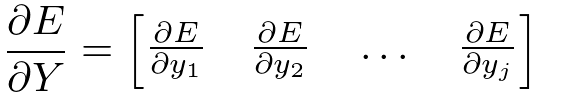

If we know the ∂E/∂Y we can easily calculate ∂E/∂W without knowing anything about the network architecture! We simply use the chain rule. Chain rule says that, if i have a two variables (g,h) function f then we have: 

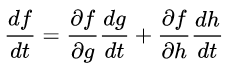

In the following example, Layer 3 is going to update its parameters using ∂E/∂Y, and is then going to pass ∂E/∂H2 to the previous layer, which is its own “∂E/∂Y”. Layer 2 is then going to do the same, and so on uo to ∂E/∂X. This way the error retropropagate towards the first layer:

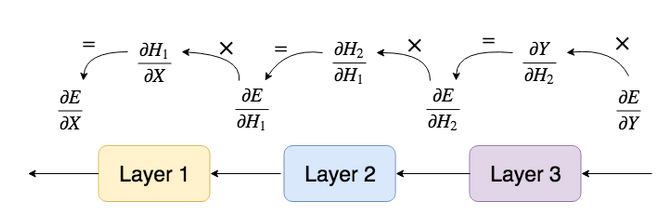

So applying chain rule we have:

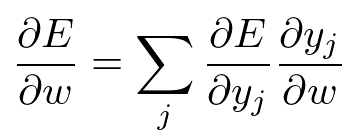

The unknown is ∂y_j/∂w which totally depends on how the layer is computing its output. So if every layer have access to ∂E/∂Y, where Y is its own output, then we can update our parameters !

Another important thing is ∂E/∂X. The output of one layer is the input of the next layer, namely ∂E/∂X for one layer is ∂E/∂Y for the previous layer! This is the most important thing in backpropagation! Every layer function is a composition of non-linear functions coming from the previous layers, so in order to calculate derivative we need the chain rule, to calculate derivative of the main function and all the inner functions. That's why we need ∂E/∂X which is: 

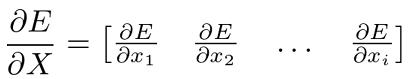

Let's now consider a matrix containing all the derivatives of the errors with respect to that layer’s outputs which is (∂E/∂Y). We need to calculate: 
a) The derivative of the error with respect to the weights and biases (∂E/∂W, ∂E/∂B),
b) The derivative of the error with respect to the input (∂E/∂X)

So we must calculate these 3 elements: 
∂E/∂W, ∂E/∂B and ∂E/∂X. 

Let's start from ∂E/∂W, which is the matrix of one gradient for every weight, and so it must have the same size as W. 

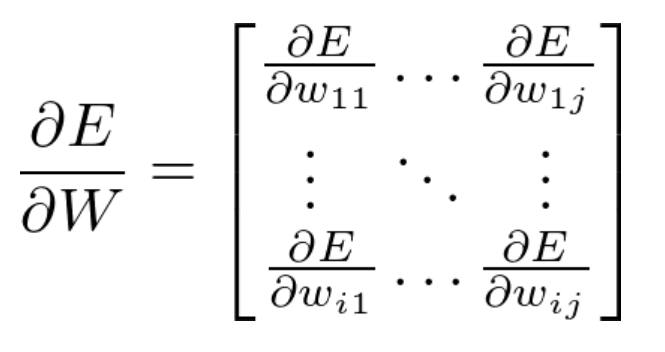

Using the chain rule we have, meaning summing all the derivatives along all the variables, in this cas [y1, y2,..., yj]: 

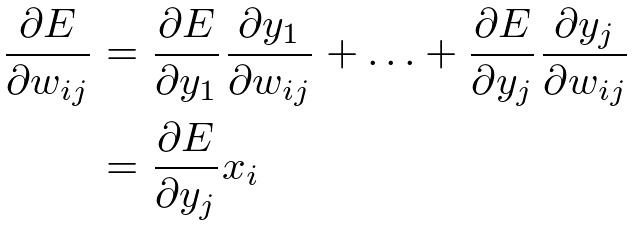

so we have: 

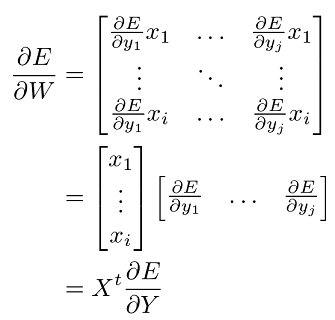

So, since we only know ∂E/∂Y, we can calculate ∂E/∂W in terms of well known vectors, that are X and ∂E/∂Y, and this is the first formula for back propagation algorithm. 

Now we can calculate ∂E/∂B: 

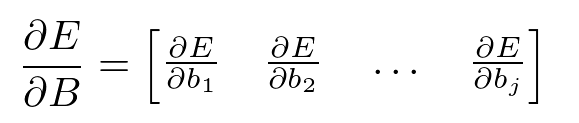

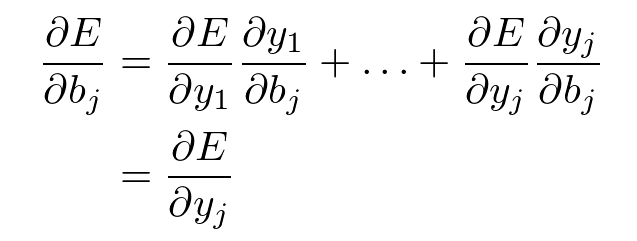

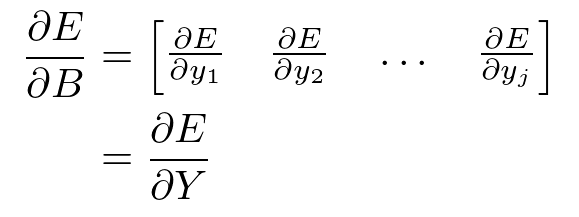

And finally we calculate: 

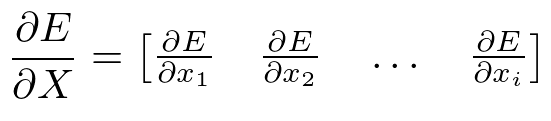

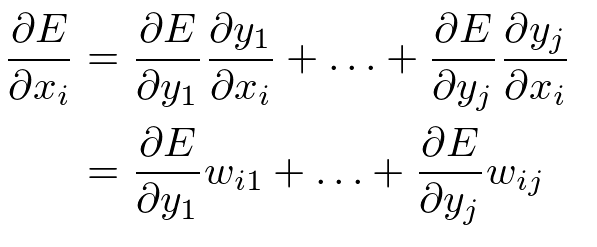

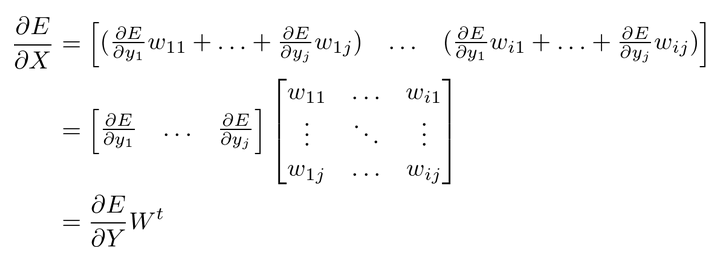

So the 3 formulas we only need to build di backward stage in training a neural network with backpropagation, are these: 

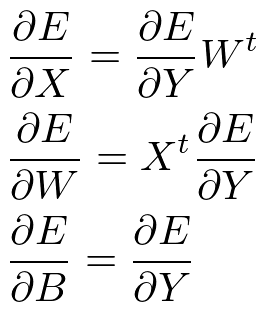

In [12]:
class Dense:
    def __init__(self, input_size, output_size):
        self.weights = np.random.rand(input_size, output_size) - 0.5
        self.bias = np.random.rand(1, output_size) - 0.5

    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = np.dot(self.input, self.weights) + self.bias
        return self.output

    def backward_propagation(self, output_error, learning_rate):
        input_error = np.dot(output_error, self.weights.T)
        weights_error = np.dot(self.input.T, output_error)
        self.weights -= learning_rate * weights_error
        self.bias -= learning_rate * output_error
        return input_error

All the calculation were completely linear. It's hopeless to learn anything with that kind of model. We need to add non-linearity to the model by applying non-linear functions to the output of some layers in order to learn reality.

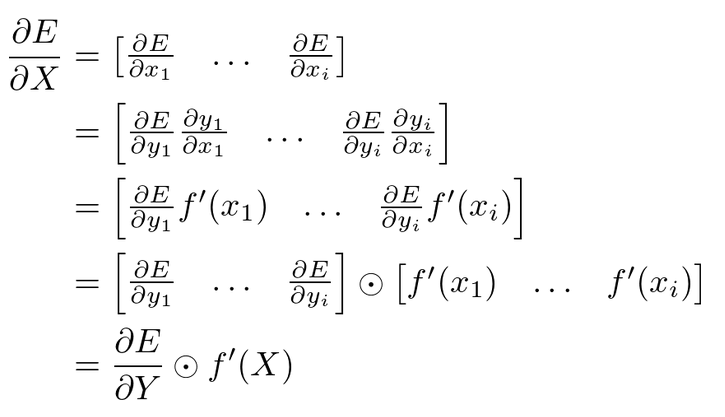

In [13]:
class Activation:
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = self.activation(self.input)
        return self.output

    def backward_propagation(self, output_error, learning_rate):
        return self.activation_prime(self.input) * output_error

Definition of Sequential class such as in Keras, to stack more Fully Connected Layers. 

In [14]:
class Sequential:
    def __init__(self):
        self.layers = []
        self.loss = None
        self.loss_prime = None

    def add(self, layer):
        self.layers.append(layer)

    def compile(self, loss, loss_prime):
        self.loss = loss
        self.loss_prime = loss_prime

    def predict(self, input_data):
        n_inputs = len(input_data)
        result = []

        for i in range(n_inputs):
            output = input_data[i]
            for layer in self.layers:
                output = layer.forward_propagation(output)
            result.append(output)

        return result

    def fit(self, x_train, y_train, epochs, learning_rate):
        n_inputs = len(x_train)

        for i in range(epochs):
            err = 0
            for j in range(n_inputs):
                output = x_train[j]
                for layer in self.layers:
                    output = layer.forward_propagation(output)

                err += self.loss(y_train[j], output)

                error = self.loss_prime(y_train[j], output)
                for layer in reversed(self.layers):
                    error = layer.backward_propagation(error, learning_rate)

            err /= n_inputs
            print('epoch %d/%d   error=%f' % (i+1, epochs, err))

# Solving the XOR problem with a Multi-Layer Perceptron

The XOR problem will not be solve by the Perceptron of Rosenblatt 

In [15]:
x_train = np.array([[[0,0]], [[0,1]], [[1,0]], [[1,1]]])
y_train = np.array([[[0]], [[1]], [[1]], [[0]]])

model = Sequential()
model.add(Dense(2, 3))
model.add(Activation(tanh, tanh_prime))
model.add(Dense(3, 1))
model.add(Activation(tanh, tanh_prime))

model.compile(mse, mse_prime)
model.fit(x_train, y_train, epochs=1000, learning_rate=0.1)

preds = model.predict(x_train)
print(preds)

epoch 1/1000   error=0.335926
epoch 2/1000   error=0.313021
epoch 3/1000   error=0.303888
epoch 4/1000   error=0.298963
epoch 5/1000   error=0.295791
epoch 6/1000   error=0.293530
epoch 7/1000   error=0.291817
epoch 8/1000   error=0.290469
epoch 9/1000   error=0.289383
epoch 10/1000   error=0.288492
epoch 11/1000   error=0.287753
epoch 12/1000   error=0.287133
epoch 13/1000   error=0.286610
epoch 14/1000   error=0.286167
epoch 15/1000   error=0.285789
epoch 16/1000   error=0.285466
epoch 17/1000   error=0.285188
epoch 18/1000   error=0.284948
epoch 19/1000   error=0.284740
epoch 20/1000   error=0.284559
epoch 21/1000   error=0.284401
epoch 22/1000   error=0.284262
epoch 23/1000   error=0.284139
epoch 24/1000   error=0.284029
epoch 25/1000   error=0.283931
epoch 26/1000   error=0.283842
epoch 27/1000   error=0.283762
epoch 28/1000   error=0.283688
epoch 29/1000   error=0.283619
epoch 30/1000   error=0.283556
epoch 31/1000   error=0.283496
epoch 32/1000   error=0.283440
epoch 33/1000   e

In [22]:
n_train_limit = -1    # -1 for eveything
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 1, 784)
x_train = x_train.astype('float32')
x_train /= 255
y_train = to_categorical(y_train)

x_test = x_test.reshape(x_test.shape[0], 1, 784)
x_test = x_test.astype('float32')
x_test /= 255
y_test = to_categorical(y_test)

model = Sequential()
model.add(Dense(28*28, 100))
model.add(Activation(tanh, tanh_prime))
model.add(Dense(100, 50))
model.add(Activation(tanh, tanh_prime))
model.add(Dense(50, 10))
model.add(Activation(tanh, tanh_prime))

model.compile(mse, mse_prime)
model.fit(x_train[0:n_train_limit], y_train[0:n_train_limit], epochs=35, learning_rate=0.1)

epoch 1/35   error=0.040217
epoch 2/35   error=0.019675
epoch 3/35   error=0.015821
epoch 4/35   error=0.013618
epoch 5/35   error=0.012190
epoch 6/35   error=0.011072
epoch 7/35   error=0.010156
epoch 8/35   error=0.009378
epoch 9/35   error=0.008738
epoch 10/35   error=0.008170
epoch 11/35   error=0.007758
epoch 12/35   error=0.007362
epoch 13/35   error=0.007038
epoch 14/35   error=0.006688
epoch 15/35   error=0.006391
epoch 16/35   error=0.006118
epoch 17/35   error=0.005911
epoch 18/35   error=0.005715
epoch 19/35   error=0.005523
epoch 20/35   error=0.005328
epoch 21/35   error=0.005193
epoch 22/35   error=0.005049
epoch 23/35   error=0.004926
epoch 24/35   error=0.004815
epoch 25/35   error=0.004708
epoch 26/35   error=0.004576
epoch 27/35   error=0.004472
epoch 28/35   error=0.004388
epoch 29/35   error=0.004329
epoch 30/35   error=0.004232
epoch 31/35   error=0.004155
epoch 32/35   error=0.004102
epoch 33/35   error=0.004023
epoch 34/35   error=0.003946
epoch 35/35   error=0.0

In [24]:
n_test_limit = 6    # -1 for eveything
pred_probs = model.predict(x_test[0:n_test_limit])
print("\n")
print("Predicted probabilities : ")
print(pred_probs, end="\n")
print("Ground Truth : ")
print(y_test[0:n_test_limit])
pred_classes = [np.argmax(p) for p in pred_probs]
print("Predicted classes : ", pred_classes)
gt_classes = [np.argmax(y) for y in y_test[0:n_test_limit]]
print("Ground Truth Classes: ", gt_classes)



Predicted probabilities : 
[array([[-6.47424714e-04, -6.28923047e-04, -8.59087885e-03,
        -6.59033426e-03,  3.64443121e-02,  8.80852557e-03,
        -2.35751696e-03,  9.87164569e-01, -9.96130433e-03,
         9.13013148e-03]]), array([[ 3.15778908e-03, -1.98306377e-03,  9.99940561e-01,
        -2.10744250e-03, -3.70213754e-03,  7.27826815e-03,
        -1.41358576e-03, -4.97741606e-04, -6.51671552e-03,
         5.78380067e-03]]), array([[-1.21094314e-03,  9.96195715e-01,  2.04867711e-02,
        -6.01336136e-03,  1.12904811e-02, -1.73104700e-02,
         2.03863558e-03, -2.06058238e-03, -2.36751558e-03,
        -3.97566258e-04]]), array([[ 0.99782633, -0.00154553, -0.02950864, -0.00116305, -0.01423426,
         0.03284598, -0.00693657,  0.00612474, -0.03195795,  0.00985145]]), array([[-0.00135173, -0.00186084, -0.01658985,  0.00265131,  0.99633616,
         0.01585081, -0.00217582,  0.00875044, -0.00636564,  0.0166282 ]]), array([[-6.60952951e-03,  9.96384686e-01,  1.72070215e-02

# Exercises

1) Plot history of trainig (errors plot)

2) Plot some training images and test images

3) Plot a Piechart with the distributin of predicted classes

# Homeworks

1) Try to compute XOR problem with a single layer Percptron, (Rosemblatt perceptron). Descrive what happens. 

2) Try the model with fashion mnist. What happens ? 

3) Try the model with Cifar 10. What happens ?